In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import plotly.express as px

# Intial Exploration of data, very simple

In [2]:
data = pd.read_csv('all-the-news-2-1.csv')
data.head(2)

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider


In [4]:
data = data.drop('section', axis = 1)

In [5]:
data = data[data['publication'].isna() == False]

In [6]:
data['publication'].value_counts().index

Index(['Reuters', 'The New York Times', 'CNBC', 'The Hill', 'People', 'CNN',
       'Refinery 29', 'Vice', 'Mashable', 'Business Insider', 'The Verge',
       'TechCrunch', 'TMZ', 'Axios', 'Vox', 'Politico', 'Washington Post',
       'Buzzfeed News', 'Gizmodo', 'Economist', 'Wired', 'Fox News',
       'Vice News', 'Hyperallergic', 'New Republic', 'New Yorker'],
      dtype='object', name='publication')

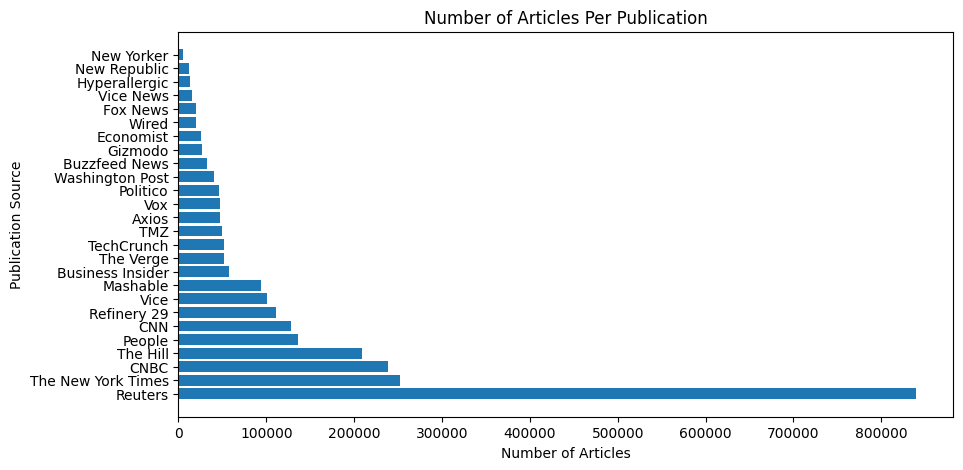

In [3]:
fig = plt.figure(figsize=(10, 5))
fig.tight_layout()
plt.barh(y = data['publication'].value_counts().index, width = data['publication'].value_counts().values)
plt.title('Number of Articles Per Publication')
plt.ylabel('Publication Source')
plt.xlabel('Number of Articles')
plt.show()
fig.savefig('articles_per_pub',bbox_inches='tight')

In [6]:
from tqdm import tqdm
tqdm.pandas()

In [8]:
data['article'].progress_apply(str) # changes all to strings
data.dtypes

100%|███████████████████████████████████████████████████████████████████| 2688878/2688878 [00:02<00:00, 1260295.72it/s]


date            object
year             int64
month          float64
day              int64
author          object
title           object
article         object
url             object
section         object
publication     object
dtype: object

In [9]:
data = data[data['article'].isna() == False]

In [10]:
data['len'] = data['article'].progress_apply(len)

100%|███████████████████████████████████████████████████████████████████| 2584165/2584165 [00:02<00:00, 1074859.61it/s]
C:\Users\cjgra\AppData\Local\Temp\ipykernel_12564\1202979211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['len'] = data['article'].progress_apply(len)


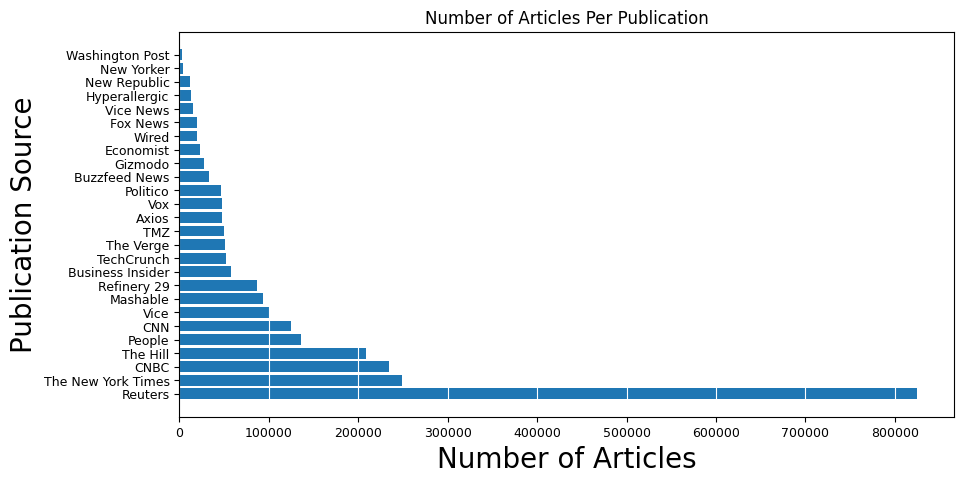

In [36]:
fig = plt.figure(figsize=(10, 5))
fig.tight_layout()
plt.barh(y = data['publication'].value_counts().index, width = data['publication'].value_counts().values)
plt.title('Number of Articles Per Publication')
plt.ylabel('Publication Source', fontsize = 20)
plt.xlabel('Number of Articles',fontsize = 20)
plt.grid(axis = 'x', color = 'white')
plt.tick_params(labelsize = 9)
plt.show()
fig.savefig('articles_per_pub',bbox_inches='tight')

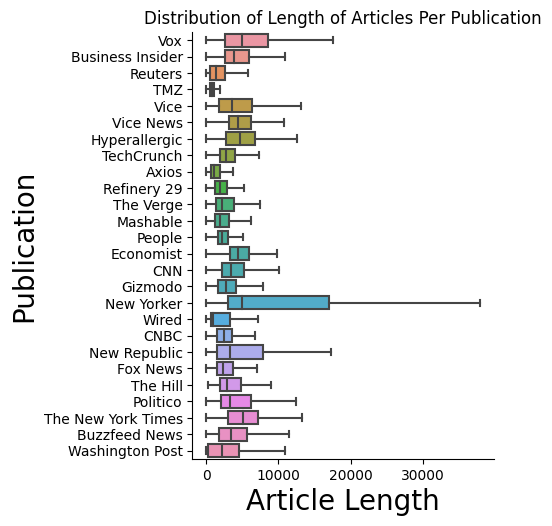

In [35]:
import seaborn as sns
fig = sns.catplot(data=data, x = "len", y="publication", kind="box", orient = 'h',showfliers = False)
plt.xlabel('Article Length', fontsize = 20)
plt.ylabel('Publication', fontsize = 20)
plt.title('Distribution of Length of Articles Per Publication')
plt.show()
fig.savefig('article_len_dist',bbox_inches='tight')

In [49]:
data[data['publication'] == 'Reuters'].author.isna().sum()

574489

In [56]:
data[data['publication'] == 'Reuters'].author.value_counts()

author
Field Level Media                      7888
Jonathan Stempel                       2400
David Shepardson                       2365
Nate Raymond                           2090
Alan Baldwin                           1352
                                       ... 
Camillus Eboh, Sharon Ogunleye            1
Lawrence White, Makini Brice              1
Nailia Bagirova, Hasmik Mkrtchyan         1
Renita D. Young, Timothy Mclaughlin       1
Toby Sterling, Inti Landauro              1
Name: count, Length: 27178, dtype: int64

In [58]:
data[data['publication'] == 'The New York Times'].author.value_counts()

author
The Associated Press             5636
The Editorial Board              3160
The New York Times               2033
Florence Fabricant               1538
The Learning Network             1460
                                 ... 
Parul Sehgal, Neil Genzlinger       1
Matthew Rosenberg, Ron Nixon        1
Judith Light                        1
John Le Carré                       1
Peter Gelb                          1
Name: count, Length: 30653, dtype: int64

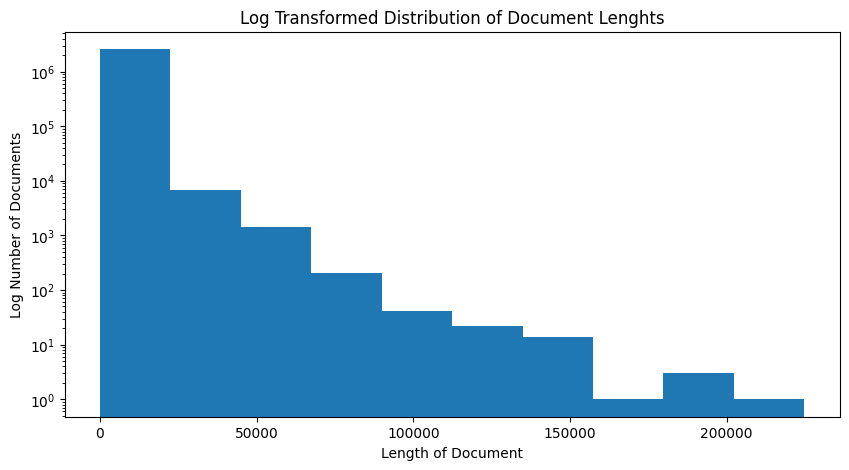

In [54]:
fig = plt.figure(figsize=(10, 5))
plt.hist(data['len'], log = True)
plt.ylabel('Log Number of Documents')
plt.xlabel('Length of Document')
plt.title('Log Transformed Distribution of Document Lenghts')
plt.show()
fig.savefig('len_dist',bbox_inches='tight')